In [72]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pathlib
from gzip import open as gzopen
import pandas as pd
from io import StringIO

In [59]:
def parse_knot_lines(lines):
    item_times_indices = []
    timesteps = []
    item_num_atoms_indices = []
    num_atoms = []
    item_boxes_indices = []
    item_atoms_indices = []
    for f, line in enumerate(lines):
        if 'TIMESTEP' in line:
            item_times_indices.append(f)
            timesteps.append(int(str(lines[f+1])))
        elif 'NUMBER OF ATOMS' in line:
            item_num_atoms_indices.append(f)
            num_atoms.append(int(str(lines[f+1])))
        elif 'BOX BOUNDS' in line:
            item_boxes_indices.append(f)
        elif 'ATOMS' in line:
            item_atoms_indices.append(f)
    atoms_lines = '\n'.join([l.strip() for l in lines[item_atoms_indices[-1]+1:
                        item_atoms_indices[-1]+1+num_atoms[-1]]])
    return atoms_lines

In [60]:

source_folders = ['/Volumes/Vicio/knots_ds_1', '/Volumes/Vicio/knots_ds_2']
data_list = {}
for folder in source_folders:
    path = pathlib.Path(folder)
    for nodetype_path in path.iterdir():
        if nodetype_path.is_dir():
            node_type = nodetype_path.name        
            if node_type not in data_list:
                data_list[node_type] = []
            data_list[node_type].extend([file.absolute() for file in nodetype_path.rglob('*') if file.suffix == '.gz'])

In [109]:
lines = gzopen(data_list['Knot_3_1'][0], mode='rt').readlines()

In [110]:
atoms = parse_knot_lines(lines)

In [111]:
knot = pd.read_csv(StringIO(atoms), sep=r'\s+', header=None, names=[
    'id', 'type', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'ix', 'iy', 'iz'
])
knot = knot.sort_values(by='id').reset_index(drop=True)

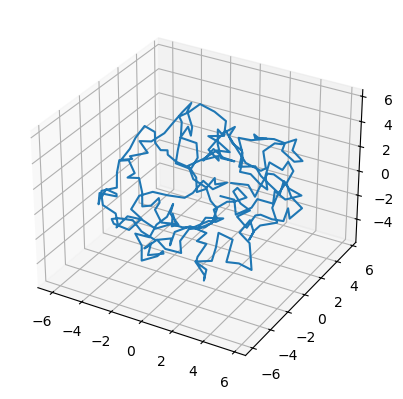

In [112]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(knot['x'], knot['y'], knot['z'])
plt.show()